# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [197]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas

In [198]:
sinasc_raw[['ESCMAE2010', 'SERIESCMAE']]

,ESCMAE2010,SERIESCMAE
0,3.0,NaN
1,3.0,NaN
2,3.0,NaN
3,5.0,NaN
4,3.0,NaN
...,...,...
27023,5.0,NaN
27024,3.0,2.0
27025,3.0,3.0
27026,3.0,3.0


In [199]:
duas_lat = pd.cut(sinasc_raw['munResLat'], [sinasc_raw['munResLat'].min(),-10.5, sinasc_raw['munResLat'].max()])

sinasc_raw.groupby(duas_lat).agg({'ESCMAE2010': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 
                                  'SERIESCMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})    

ESCMAE2010                                                 \
                       sum      mean  min  max median       std       var   
munResLat                                                                   
(-13.5, -10.5]     39512.0  3.076061  0.0  9.0    3.0  1.087237  1.182084   
(-10.5, -8.769]    41645.0  3.006208  0.0  9.0    3.0  1.092841  1.194302   

                SERIESCMAE                                                 
                       sum      mean  min  max median       std       var  
munResLat                                                                  
(-13.5, -10.5]     35894.0  4.013193  1.0  8.0    3.0  2.299173  5.286195  
(-10.5, -8.769]    23885.0  4.493040  1.0  8.0    3.0  2.459177  6.047553

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas

In [200]:
duas_area = pd.cut(sinasc_raw['munResArea'], [sinasc_raw['munResArea'].min(),3000, sinasc_raw['munResArea'].max()])

sinasc_raw.groupby(duas_area).agg({'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 
                                  'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})    

CONSULTAS                                               \
                          sum      mean min max median       std       var   
munResArea                                                                   
(459.978, 3000.0]       19272  3.738506   1   9    4.0  0.608679  0.370490   
(3000.0, 34096.394]     77142  3.537326   1   9    4.0  0.820967  0.673986   

                    QTDFILVIVO                                                  
                           sum      mean  min   max median       std       var  
munResArea                                                                      
(459.978, 3000.0]       4718.0  0.925098  0.0  30.0    1.0  1.076172  1.158146  
(3000.0, 34096.394]    22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas

In [201]:
duas_alt = pd.qcut(sinasc_raw['munResAlt'], 4)

sinasc_raw.groupby(duas_alt).agg({'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 
                                  'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})    

CONSULTAS                                               \
                     sum      mean min max median       std       var   
munResAlt                                                               
(84.999, 87.0]     29285  3.337702   1   9    4.0  0.982834  0.965962   
(87.0, 153.0]      17294  3.567244   1   9    4.0  0.740259  0.547984   
(153.0, 191.0]     25991  3.746180   1   9    4.0  0.580052  0.336460   
(191.0, 595.0]     24092  3.725375   1   9    4.0  0.620341  0.384823   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
munResAlt                                                                  
(84.999, 87.0]     8976.0  1.177798  0.0  12.0    1.0  1.236798  1.529670  
(87.0, 153.0]      5430.0  1.189225  0.0  14.0    1.0  1.319208  1.740309  
(153.0, 191.0]     6354.0  0.922608  0.0   9.0    1.0  1.041525  1.084773  
(191.0, 595.0]     6066.0  0.950784  0.0  30.0    1.0  1.079861  1.166099

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [202]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_2 = sinasc_raw.set_index('munResNome')
sinasc_2.groupby(imediatas)['IDADEMAE'].mean()

munResNome
Ariquemes      25.459635
Cacoal         26.347817
Jaru           25.708853
Ji-Paraná      26.094720
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

In [203]:
sinasc_2_imediatas = sinasc_2.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack()
sinasc_2_imediatas

munResNome,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,23.200000,23.250000,31.000000,24.142857,21.388889,27.750000
2019-01-02,26.166667,27.666667,30.800000,25.545455,26.050000,28.727273
2019-01-03,24.142857,27.846154,26.000000,27.000000,26.638889,23.375000
2019-01-04,24.666667,25.230769,22.500000,23.125000,28.814815,26.000000
2019-01-05,22.888889,23.200000,23.250000,27.100000,27.250000,28.200000
...,...,...,...,...,...,...
2019-12-27,24.666667,24.000000,25.333333,27.466667,28.410256,27.000000
2019-12-28,23.833333,22.888889,23.333333,26.375000,26.291667,22.666667
2019-12-29,23.166667,24.100000,24.666667,24.125000,25.470588,24.250000


<AxesSubplot:xlabel='DTNASC', ylabel='Cacoal'>

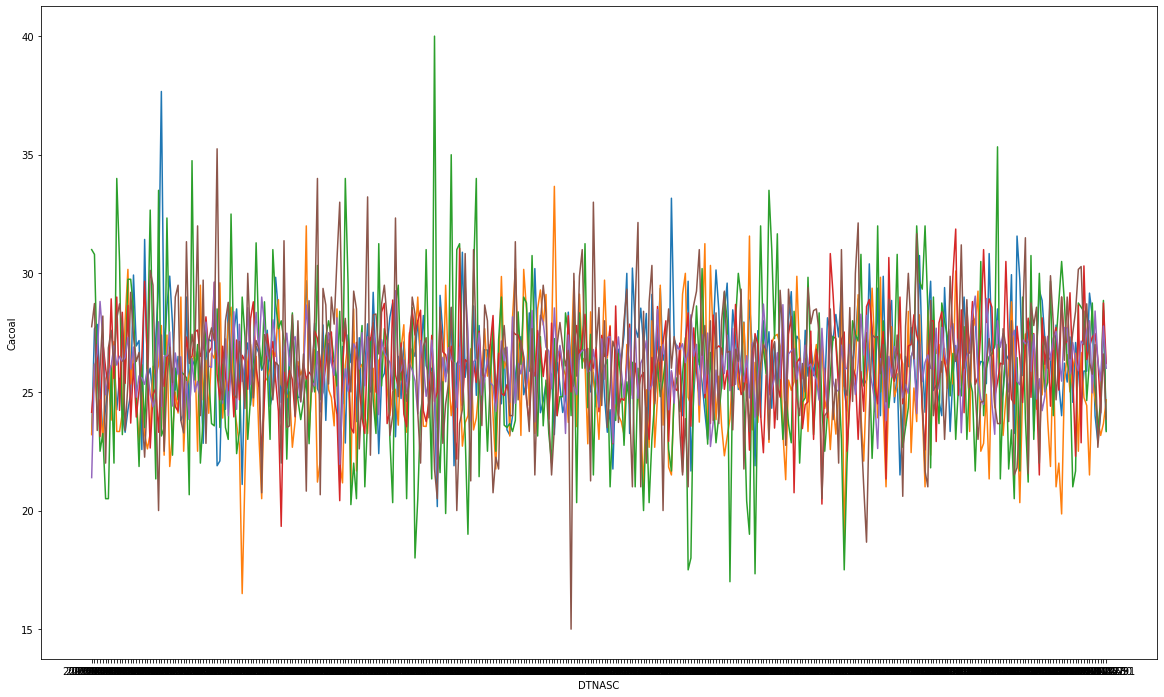

In [204]:
plt.figure(figsize=(20, 12))
sns.lineplot(x = 'DTNASC' , y = 'Cacoal', data = sinasc_2_imediatas, markers=True, dashes = False, estimator = None)
sns.lineplot(x = 'DTNASC' , y = 'Ariquemes', data = sinasc_2_imediatas, markers=True)
sns.lineplot(x = 'DTNASC' , y = 'Jaru', data = sinasc_2_imediatas, markers=True)
sns.lineplot(x = 'DTNASC' , y = 'Ji-Paraná', data = sinasc_2_imediatas, markers=True)
sns.lineplot(x = 'DTNASC' , y = 'Porto Velho', data = sinasc_2_imediatas, markers=True)
sns.lineplot(x = 'DTNASC' , y = 'Vilhena', data = sinasc_2_imediatas, markers=True)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [205]:
colunas = ['munResNome', 'IDH']
idh_m = [['Porto Velho',0.736],
['Vilhena',0.731],
['Cacoal',0.718,],
['Ji-Paraná',0.714],
['Pimenta Bueno',0.710],
['Ariquemes',0.702],
['Rolim de Moura',0.700],

['Cerejeiras',0.692],
['Jaru',0.689],
['Colorado do Oeste',0.685],
['Ouro Preto do Oeste',0.682],
["Espigão D'Oeste",0.672],
["Santa Luzia D'Oeste",0.670],
['Pimenteiras do Oeste',.665],
['Presidente Médici',0.664],
['Castanheiras',0.658],
['Guajará-Mirim',0.657],
['Chupinguaia',0.652],
['Cabixi',0.650],
['Candeias do Jamari',0.649],
["São Felipe D'Oeste",0.649],
['Cacaulândia',0.646],
['São Miguel do Guaporé',0.646],
['Mirante da Serra',0.643],
["Alvorada D'Oeste",0.64],
['Teixeirópolis',0.643],
["Nova Brasilândia D'Oeste",0.643],
['Rio Crespo',0.643],
['Primavera de Rondônia',0.641],
["Alta Floresta D'Oeste",0.641],
['Ministro Andreazza',0.638],
['Novo Horizonte do Oeste',0.634],
["Alta Floresta D'Oeste",0.641],
['Vale do Paraíso',0.627],
['Alto Paraíso',0.625],
['Parecis',0.617],
['Buritis',0.616],
['Itapuã do Oeste',0.614],
['Corumbiara',0.613],
['Cujubim',0.612],
['Costa Marques',0.611],
['São Francisco do Guaporé',0.611],
['Urupá',0.609],
['Monte Negro',0.607],

['Seringueiras',0.598],
['Governador Jorge Teixeira',0.596],
["Machadinho D'Oeste",0.596],
['Campo Novo de Rondônia',0.593],
['Alto Alegre dos Parecis',0.592],
['Theobroma',0.589],
['Nova União',0.587],
['Nova Mamoré',0.587],
['Vale do Anari',0.584]
]

idh = pd.DataFrame(idh_m, columns = colunas)
sinasc_2 = sinasc_2.merge(idh, on = 'munResNome', how = 'left')
idh.head()

,munResNome,IDH
0,Porto Velho,0.736
1,Vilhena,0.731
2,Cacoal,0.718
3,Ji-Paraná,0.714
4,Pimenta Bueno,0.710


In [206]:
sinasc_2['IDH_QUALI'] = pd.cut(sinasc_2['IDH'], [0, 0.626, 0.645,0.688,0.764,1], labels = ['muito baixo',
                                                                               'baixo',
                                                                               'médio',
                                                                               'alto', 
                                                                               'muito alto'])


mapping = {'muito alto' : 'IDH muito alto',
    'alto' : 'IDH alto',
    'médio' : 'IDH médio',
    'baixo' : 'IDH baixo',
    'muito baixo' : 'IDH muito baixo'
}
sinasc_3 = sinasc_2.set_index('IDH_QUALI')
sinasc_3.groupby(mapping).agg({'IDADEMAE': ['min', 'mean', 'median', 'max'],
                              'QTDFILVIVO': ['min', 'mean', 'median', 'max']})

IDADEMAE                       QTDFILVIVO                   \
                     min       mean median max        min      mean median   
IDH_QUALI                                                                    
IDH muito baixo       11  25.355528   25.0  46        0.0  1.123820    1.0   
IDH baixo             14  26.201794   26.0  53        0.0  0.900057    1.0   
IDH médio             13  25.934109   25.0  47        0.0  1.169769    1.0   
IDH alto              12  26.278418   26.0  53        0.0  1.025890    1.0   

                       
                  max  
IDH_QUALI              
IDH muito baixo  14.0  
IDH baixo         9.0  
IDH médio        30.0  
IDH alto         12.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [207]:
col = ['munResNome', 'IFDM']
ifdm_lista = [['Ariquemes',0.7746],
['Vilhena',0.7465],
['Pimenta Bueno',0.7383],
['Porto Velho',0.7257],
['Ji-Paraná',0.7117],
['Cacoal',0.7111],
["Santa Luzia D'Oeste",0.6850],
['Rolim de Moura',0.6785],
['Chupinguaia',0.6766],
['São Miguel do Guaporé',0.6699],
['Pimenteiras do Oeste',0.6501],
['Teixeirópolis',0.6500],
['Colorado do Oeste',0.6473],
['Jaru',0.6450],
['Rio Crespo',0.6430],
['Primavera de Rondônia',0.6384],
["Alta Floresta D'Oeste",0.6337],
['Ouro Preto do Oeste',0.6261],
['São Francisco do Guaporé',0.6214],
['Candeias do Jamari',0.6199],
['Buritis',0.6199],
["São Felipe D'Oeste",0.6153],
['Presidente Médici',0.6140],
['Cerejeiras',0.6137],
['Monte Negro',0.6016],
['Urupá',0.6006],
        
["Espigão D'Oeste",0.5973],
["Seringueiras",0.5922],
["Alvorada D'Oeste",0.5919],
["Itapuã do Oeste",0.5903],
['Cabixi',0.5887],
['Novo Horizonte do Oeste',0.5858],
["Nova Brasilândia D'Oeste",0.5857],
["Vale do Paraíso",0.5818],
['Corumbiara',0.5759],
['Alto Paraíso',0.5735],
['Cacaulândia',0.5721],
['Vale do Anari',0.5710],
['Ministro Andreazza',0.5657],
['Costa Marques',0.5626],
['Nova União',0.5571],
['Guajará-Mirim',0.5541],
['Mirante da Serra',0.5519],
['Parecis',0.5502],
['Castanheiras',0.5430],
['Theobroma',0.5405],
["Machadinho D'Oeste",0.5322],
['Campo Novo de Rondônia',0.5272],
['Nova Mamoré',0.5084],
['Cujubim',0.5055],
['Alto Alegre dos Parecis',0.5046],
['Governador Jorge Teixeira',0.4562]
]

ifdm = pd.DataFrame(ifdm_lista, columns = col)
sinasc_2 = sinasc_2.merge(ifdm, on = 'munResNome', how = 'left')
ifdm.head()

,munResNome,IFDM
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117


In [208]:
sinasc_2['IFDM_QUALI'] = pd.cut(sinasc_2['IFDM'], [0,0.4562, 0.6006,0.7746,1], labels = ['baixo',
                                                                               'regular',
                                                                                'moderado',
                                                                               'alto'])
mapping2 = {'alto' : 'IFDM alto',
    'regular' : 'IFDM regular',
    'moderado' : 'IFDM moderado',    
    'baixo' : 'IFDM baixo'
}
sinasc_4 = sinasc_2.set_index('IFDM_QUALI')
sinasc_4.groupby(mapping2).agg({'IDADEMAE': ['min', 'mean', 'median', 'max'],
                              'QTDFILVIVO': ['min', 'mean', 'median', 'max']})

IDADEMAE                       QTDFILVIVO                       
                   min       mean median max        min      mean median   max
IFDM_QUALI                                                                    
IFDM baixo          13  24.401786   24.0  41        0.0  0.768519    1.0   5.0
IFDM regular        11  25.597976   25.0  52        0.0  1.165567    1.0  14.0
IFDM moderado       12  26.215734   26.0  53        0.0  1.024967    1.0  30.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [209]:
cols = ['munResNome', 'PIB']

pib_lista = [  
['Porto Velho',17912070],
['Ji-Paraná',3783972],
['Vilhena',2831175],
['Ariquemes',2579830],
['Cacoal',2261644],
['Jaru',1500890],
['Rolim de Moura',1283434],
['Pimenta Bueno',164877],    
    
['Guajará-Miri',893000],
['Ouro Preto do Oeste',834000],
['Buritis',726000],
['Machadinho do Oeste',633000],
["Espigão D'Oeste",625000],
['São Miguel do Guaporé',616000],
['Candeias do Jamari',548000],
['Nova Mamoré',529000],
['Cerejeiras',507000] ,
    
["Alta Floresta D'Oeste",496000],
['Presidente Médici',428000],
['Cujubim',385000],
['Nova Brasilândia do Oeste',360000],
['Alto Paraíso',358000],
['São Francisco do Guaporé',353000],
['Colorado do Oeste',335000],
    
['Monte Negro',219152],
['Alto Alegre dos Parecis',213410],
['Campo Novo de Rondônia',208821],
['Alvorada do Oeste',204098],
    
['Chupinguaia',190331],
['Corumbiara',188218],
['Ministro Andreazza',174633],
['Urupá',172143],
['Costa Marques',171878],
['Seringueiras',169429],
['Mirante da Serra',163955],
['Governador Jorge Teixeira',148027],
['Theobroma',140601],
['Santa Luzia do Oeste',135934],
['Novo Horizonte do Oeste',129399],
['Itapuã do Oeste',129351],
['Vale do Paraíso',116742],
['Cacaulândia',116635],
['Cabixi',113031],
['Vale do Anari',105208],
    
['Nova União',92346],
['Parecis',80759],
['Rio Crespo',76854],
['Pimenteiras do Oeste',76756],
['Teixeirópolis',72089],
['São Felipe do Oeste',72084],
['Castanheiras',59779],
['Primavera de Rondônia',5290]]

pib = pd.DataFrame(pib_lista, columns = cols)
sinasc_2 = sinasc_2.merge(pib, on = 'munResNome', how = 'left')
pib.head()

,munResNome,PIB
0,Porto Velho,17912070
1,Ji-Paraná,3783972
2,Vilhena,2831175
3,Ariquemes,2579830
4,Cacoal,2261644


In [216]:
sinasc_2['PIB_QUALI'] = pd.cut(sinasc_2['PIB'], [0,92346, 190331,496000,893000,17912070], labels = ['Até 100M',
                                                                                'Até 200M',
                                                                                'Até 300M',
                                                                                'Até 500M',
                                                                                'Mais de 500M'])
mapping3 = {'Até 100M' : 'Pib muito baixo',
    'Até 200M' : 'Pib baixo',
    'Até 300M' : 'Pib regular',    
    'Até 500M' : 'Pib moderado',
    'Mais de 500M' : 'Pib muito alto'
}
sinasc_4 = sinasc_2.set_index('PIB_QUALI')
sinasc_4.groupby(mapping3).agg({'IDADEMAE': ['min', 'mean', 'median', 'max'],
                              'QTDFILVIVO': ['min', 'mean', 'median', 'max']})

IDADEMAE                       QTDFILVIVO                   \
                     min       mean median max        min      mean median   
PIB_QUALI                                                                    
Pib muito baixo       14  26.519894   26.0  41        0.0  1.032258    1.0   
Pib baixo             12  25.528959   25.0  52        0.0  0.960132    1.0   
Pib regular           11  25.673852   25.0  53        0.0  0.990980    1.0   
Pib moderado          14  25.915316   25.0  53        0.0  1.168855    1.0   
Pib muito alto        12  26.303914   26.0  47        0.0  1.032646    1.0   

                       
                  max  
PIB_QUALI              
Pib muito baixo   6.0  
Pib baixo        14.0  
Pib regular       8.0  
Pib moderado     12.0  
Pib muito alto   12.0

### Cruzando dados

In [239]:
sinasc_6 = sinasc_2.groupby([ 'munResNome'])[['IDH', 'IFDM', 'PIB','IDADEMAE', 'QTDFILVIVO', 'PESO']].mean().sort_values('IDH')
sinasc_6

,IDH,IFDM,PIB,IDADEMAE,QTDFILVIVO,PESO
munResNome,,,,,,
Vale do Anari,0.584,0.5710,105208.0,26.096774,1.173913,3223.806452
Nova Mamoré,0.587,0.5084,529000.0,25.326389,1.295455,3248.851852
Nova União,0.587,0.5571,92346.0,26.894231,0.844660,3193.221154
Theobroma,0.589,0.5405,140601.0,25.536082,0.905263,3227.865979
Alto Alegre dos Parecis,0.592,0.5046,213410.0,24.844156,0.907895,3261.383117
Campo Novo de Rondônia,0.593,0.5272,208821.0,24.825301,1.160305,3227.969880
Machadinho D'Oeste,0.596,0.5322,NaN,25.480000,1.114286,3197.368000
Governador Jorge Teixeira,0.596,0.4562,148027.0,24.401786,0.768519,3238.991071
Seringueiras,0.598,0.5922,169429.0,24.910714,0.880240,3289.142857


<AxesSubplot:xlabel='munResNome', ylabel='IDH'>

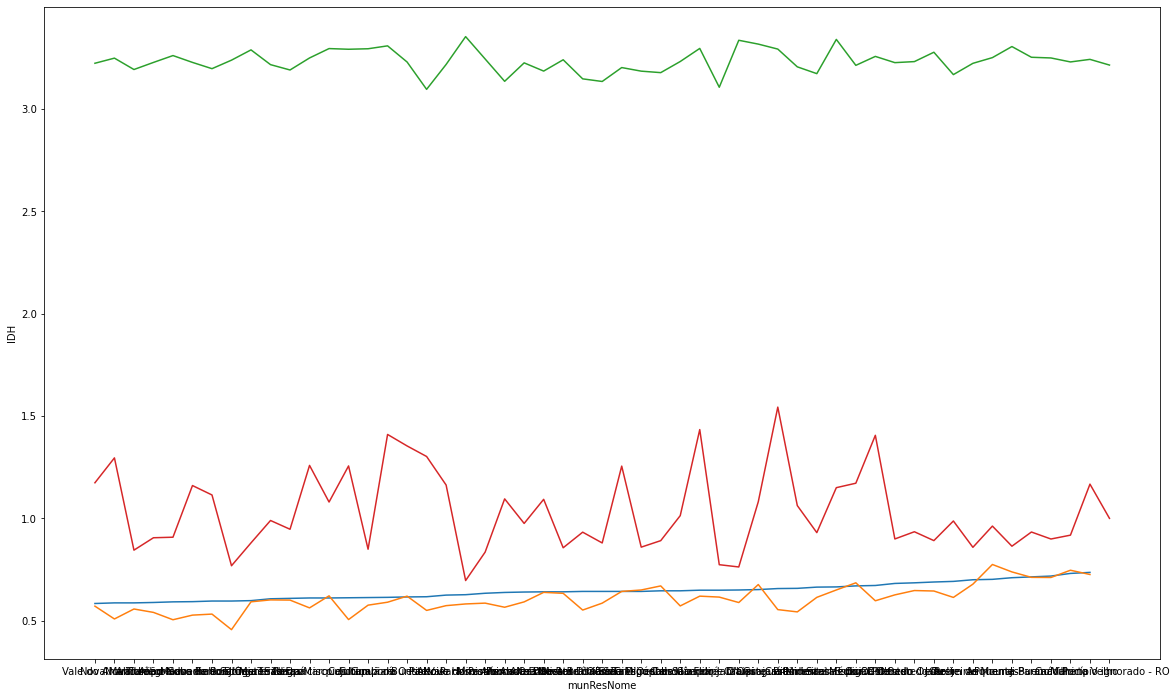

In [240]:
plt.figure(figsize=(20, 12))
sns.lineplot(y = 'IDH' , x = 'munResNome', data = sinasc_6)
sns.lineplot(y = 'IFDM' , x = 'munResNome', data = sinasc_6)
sinasc_6['Peso/1000'] = sinasc_6.PESO/1000
sns.lineplot(y = 'Peso/1000' , x = 'munResNome', data = sinasc_6)
sns.lineplot(y = 'QTDFILVIVO' , x = 'munResNome', data = sinasc_6)

A distribuição das variáveis peso, idademae e QTDFILVIVO parece não ter relação direta com IDH, PIB e IFDM